## Solução da equação de KdV por FFT

A equação de Korteweg-de Vries (KdV) modela ondas pouco dispersivas em canais profundos, ondas em plasmas, e tem a forma:

$$u_t+uu_x+u_{xxx}=0,\qquad x\in[-\pi,\pi]$$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from numpy import pi,cosh,exp,round,zeros,arange,real
from numpy.fft import fft,ifft, fftfreq
from matplotlib.pyplot import figure

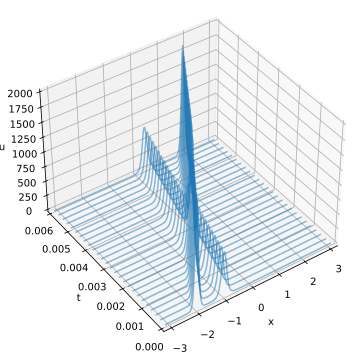

In [2]:
# Construímos a grelha e a matriz de diferenciação
N      = 256
dt     = 0.4/N**2
x      = (2*pi/N)*arange(-N//2,N//2)
A, B   = 25.0, 16.0
u      = 3*A**2/cosh(0.5*A*(x+2))**2 + 3*B**2/cosh(0.5*B*(x+1))**2
v      = fft(u) 
k      = zeros(N)
k[0:N//2]  = arange(0,N//2)
k[N//2+1:] = arange(-N//2+1,0,1)
#dx = x[0]-x[1]
#k = fftfreq(N,dx)
ik3    = 1j*k**3

# Avançamos no tempo com o método de Runge-Kutta
tmax   = 0.006
nplt   = int(round((tmax/25)/dt))
nmax   = int(round(tmax/dt))
udata  = []
udata.append(list(zip(x, u)))
tdata  = [0.0]
for n in range(1,nmax+1):
    t = n*dt
    g = -0.5j*dt*k
    E = exp(dt*ik3/2); E2 = E**2
    a = g * fft(real(ifft( v         ))**2)
    b = g * fft(real(ifft( E*(v+a/2) ))**2)
    c = g * fft(real(ifft( E*v+b/2   ))**2)
    d = g * fft(real(ifft( E2*v+E*c  ))**2)
    v = E2*v + (E2*a + 2*E*(b+c) + d)/6
    if n%nplt == 0:
        u = real(ifft(v))
        udata.append(list(zip(x, u)))
        tdata.append(t);

fig  = figure(figsize=(12,6))
ax   = fig.add_subplot(111,projection='3d')
poly = LineCollection(udata)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=tdata, zdir='y')
ax.set_xlabel('x')
ax.set_xlim3d(-pi, pi)
ax.set_ylabel('t')
ax.set_ylim3d(0, tmax)
ax.set_zlabel('u')
ax.set_zlim3d(0, 2000)
ax.view_init(40,-125);